# Problem Statement
Developing a Multi class classifier to predict the damage caused to a vehicle by understanding the Vehicle crash data of Maryland state

## Data Information:

This is a Crash data for Maryland from January 2015 through December 2021. Each row represents the details of a crashed vehicle. The following is the link to the data set and the details the dataset provides us:

### Link: https://opendata.maryland.gov/resource/mhft-5t5y.csv

    Column Name	                Description	
    HARM_EVENT_DESC	            Description of the vehicle that the harm occured to
    HARM_EVENT_CODE	            Code of the Harm Event
    CONTI_DIRECTION_DESC	    Direction in which the vehicle continued
    CONTI_DIRECTION_CODE	    Code of Direction
    DAMAGE_DESC	                Damage impact of the vehicle 
    DAMAGE_CODE	                Code of the damage impact
    MOVEMENT_DESC	            Description of the Movement
    MOVEMENT_CODE	            Code of the Movement
    VIN_NO	                    Vehicle VIN Number
    REPORT_NO	                Report Number
    CV_BODY_TYPE_DESC	        Description of the Body Type of the Vehicle
    CV_BODY_TYPE_CODE	        Code of the Body Type
    VEH_YEAR	                Vehicle Registered Year 
    VEH_MAKE	                Make of the Vehicle
    VEH_MODEL	                Model of the Vehicle
    COMMERCIAL_FLAG_DESC	    Flag for a Commercial Vehicle
    COMMERCIAL_FLAG	            Flag code for a Commercial Vehicle
    HZM_NUM	                    
    TOWED_AWAY_FLAG_DESC	    Flag if the vehicle is Towed Away
    TOWED_AWAY_FLAG	            Code of Flag for Towed Away
    NUM_AXLES	                Number of Axles
    GVW_DESC	                Description of the Weight of Vehicle
    GVW_CODE	                Code for the Weight of Vehicle
    GOING_DIRECTION_DESC	    Description of the Direction the vehicle is moving 
    GOING_DIRECTION_CODE	    Code for the direction the Vehicle is moving
    BODY_TYPE_DESC	            Description of Body Type
    BODY_TYPE_CODE	            Code for the Body type
    DRIVERLESS_FLAG_DESC	    Flag for a Driverless car
    DRIVERLESS_FLAG	            Code for the Flag of Driverless car
    FIRE_FLAG_DESC	            Flag for a Fire
    FIRE_FLAG	                Code for the Flag for Fire
    PARKED_FLAG_DESC	        Flag for a Parked Vehicle
    PARKED_FLAG	                Code for the flag of a parked vehicle
    SPEED_LIMIT	                Speed Limit of the road
    HIT_AND_RUN_FLAG_DESC	    Flag for a Hit and Run
    HIT_AND_RUN_FLAG	        Code for Flag of a Hit and Run
    HAZMAT_SPILL_FLAG_DESC	    
    HAZMAT_SPILL_FLAG	
    VEHICLE_ID	                Id of the Vehicle
    TOWED_VEHICLE_CONFIG_DESC	Description of the Towing vehicle
    TOWED_VEHICLE_CONFIG_CODE	Code of the Towing vehicle
    AREA_DAMAGED_CODE_IMP1	    
    AREA_DAMAGED_CODE1	
    AREA_DAMAGED_CODE2	
    AREA_DAMAGED_CODE3	
    AREA_DAMAGED_CODE_MAIN_DESC	Description of the area of impact for the Vehicle      
    AREA_DAMAGED_CODE_MAIN	
    YEAR	                    Year the Crash occurred   
    Quarter	                    Quarter of the Year


### Importing Libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Imprting Data into a Data Frame from a CSV file
df=pd.read_csv('Maryland_Statewide_Vehicle_Crashes_-_Vehicle_Details.csv')

In [3]:
df.head()

,HARM_EVENT_DESC,HARM_EVENT_CODE,CONTI_DIRECTION_DESC,CONTI_DIRECTION_CODE,DAMAGE_DESC,DAMAGE_CODE,MOVEMENT_DESC,MOVEMENT_CODE,VIN_NO,REPORT_NO,...,TOWED_VEHICLE_CONFIG_DESC,TOWED_VEHICLE_CONFIG_CODE,AREA_DAMAGED_CODE_IMP1,AREA_DAMAGED_CODE1,AREA_DAMAGED_CODE2,AREA_DAMAGED_CODE3,AREA_DAMAGED_CODE_MAIN_DESC,AREA_DAMAGED_CODE_MAIN,YEAR,Quarter
0,Other Vehicle,1.0,North,N,Unknown,99,Unknown,99.0,NaN,AE5057004X,...,Unknown,99,11.0,10.0,11.0,12.0,Eleven o'clock,11.0,2020,Q2
1,Other Vehicle,1.0,North,N,Superficial,2,Moving Constant Speed,1.0,NMTKHMBX0JR025092,MSP7221001P,...,Not Applicable,0,12.0,6.0,12.0,NaN,Twelve o'clock,12.0,2020,Q2
2,Other Vehicle,1.0,South,S,Functional,3,Stopped in Traffic Lane,6.0,2GNAXPEX5K6103012,DA37010040,...,Not Applicable,0,6.0,6.0,NaN,NaN,Six o'clock,6.0,2020,Q2
3,Fixed Object,9.0,Unknown,U,Unknown,99,Not Applicable,0.0,NaN,MDTA1791002C,...,Not Applicable,0,99.0,99.0,NaN,NaN,Unknown,99.0,2020,Q2
4,Other Vehicle,1.0,East,E,Disabling,4,Slowing or Stopping,3.0,5FNRL18672B048550,AE456100BL,...,Not Applicable,0,6.0,6.0,12.0,NaN,Six o'clock,6.0,2020,Q2


In [4]:
df.shape

(1438808, 49)

The Data Consists of 1,438,808 rows and 49 rows in total.

In [5]:
df.describe()

,HARM_EVENT_CODE,DAMAGE_CODE,MOVEMENT_CODE,CV_BODY_TYPE_CODE,VEH_YEAR,NUM_AXLES,GVW_CODE,BODY_TYPE_CODE,SPEED_LIMIT,TOWED_VEHICLE_CONFIG_CODE,AREA_DAMAGED_CODE_IMP1,AREA_DAMAGED_CODE1,AREA_DAMAGED_CODE2,AREA_DAMAGED_CODE3,AREA_DAMAGED_CODE_MAIN,YEAR
count,1.438808e+06,1.438808e+06,1.438808e+06,58260.000000,1.368267e+06,58156.000000,58260.000000,1.384382e+06,1.438808e+06,1.438808e+06,1.427978e+06,1.377967e+06,782335.000000,512108.000000,1.423515e+06,1.438808e+06
mean,3.100420e+00,9.569909e+00,7.842272e+00,9.037674,1.987964e+03,2.811473,16.105956,9.770422e+00,3.356614e+01,1.823667e+00,1.257396e+01,1.072409e+01,9.145475,10.766750,1.254042e+01,2.017914e+03
std,9.700444e+00,2.398240e+01,1.758675e+01,22.747555,2.993017e+02,2.982974,33.726195,1.690448e+01,1.596959e+01,1.307618e+01,1.913933e+01,2.014020e+01,7.361611,5.850509,1.903289e+01,1.973938e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,2.015000e+03
25%,1.000000e+00,2.000000e+00,1.000000e+00,1.000000,2.005000e+03,2.000000,2.000000,2.000000e+00,2.500000e+01,0.000000e+00,6.000000e+00,2.000000e+00,6.000000,9.000000,6.000000e+00,2.016000e+03
50%,1.000000e+00,3.000000e+00,3.000000e+00,2.000000,2.010000e+03,2.000000,3.000000,2.000000e+00,3.500000e+01,0.000000e+00,1.100000e+01,6.000000e+00,11.000000,12.000000,1.100000e+01,2.018000e+03
75%,1.000000e+00,4.000000e+00,1.000000e+01,5.000000,2.015000e+03,3.000000,3.000000,2.000000e+01,4.500000e+01,0.000000e+00,1.200000e+01,1.100000e+01,11.000000,12.000000,1.200000e+01,2.020000e+03
max,9.900000e+01,9.900000e+01,9.900000e+01,99.000000,9.999000e+03,99.000000,99.000000,9.900000e+01,7.500000e+01,9.900000e+01,9.900000e+01,9.900000e+01,99.000000,99.000000,9.900000e+01,2.021000e+03


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438808 entries, 0 to 1438807
Data columns (total 49 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   HARM_EVENT_DESC              1438808 non-null  object 
 1   HARM_EVENT_CODE              1438808 non-null  float64
 2   CONTI_DIRECTION_DESC         1283866 non-null  object 
 3   CONTI_DIRECTION_CODE         1283866 non-null  object 
 4   DAMAGE_DESC                  1438808 non-null  object 
 5   DAMAGE_CODE                  1438808 non-null  int64  
 6   MOVEMENT_DESC                1438808 non-null  object 
 7   MOVEMENT_CODE                1438808 non-null  float64
 8   VIN_NO                       1367593 non-null  object 
 9   REPORT_NO                    1438808 non-null  object 
 10  CV_BODY_TYPE_DESC            58260 non-null    object 
 11  CV_BODY_TYPE_CODE            58260 non-null    float64
 12  VEH_YEAR                     1368267 non-n

Here we can see that some of the columns have a lot less Non-Null values. So let us plot to see how many Null Values are present in each column

#### Plotting to identify Null Values

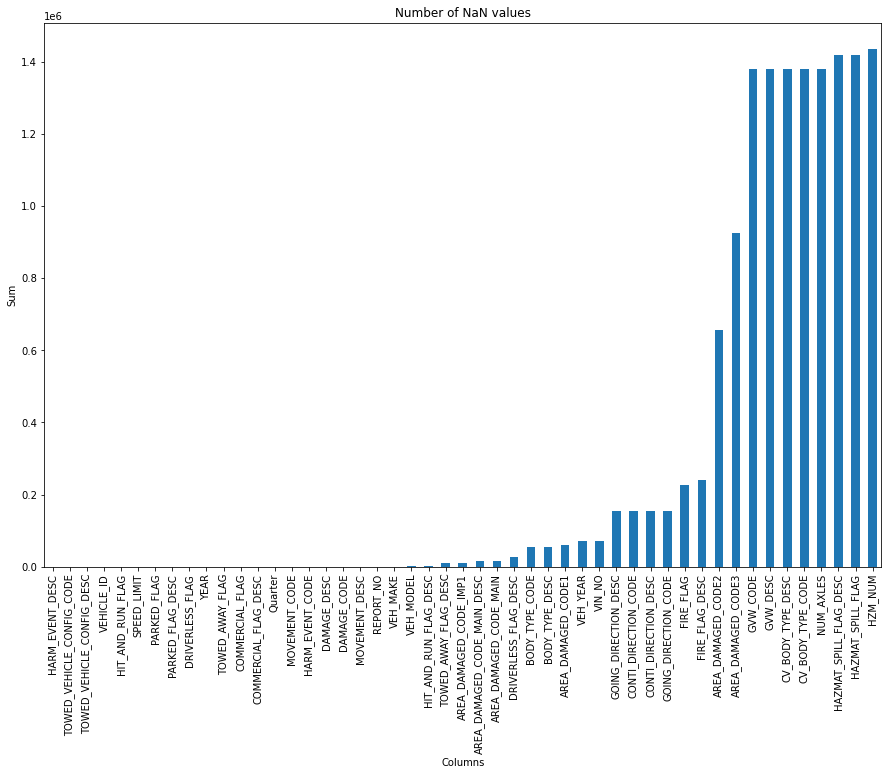

In [13]:
df.isnull().sum().sort_values().plot(kind='bar', figsize=(15,10))
plt.title('Number of NaN values')
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.show()

A plot is drwan in ascending order to identify Null values in a column as we can see 8 columns have Null values with a percentage of 90. These can definetly be eliminated. 

The Following are the columns I have selected for my features: 
DAMAGE_DESC,
HARM_EVENT_DESC,
MOVEMENT_DESC,
BODY_TYPE_DESC,
SPEED_LIMIT,
HIT_AND_RUN_FLAG,
TOWED_VEHICLE_CONFIG_DESC,
AREA_DAMAGED_CODE_MAIN_DESC,
PARKED_FLAG_DESC.

##### Looking at the Features I have selected as Categorical and Numerical. Checking if all the values present are unique to themselves or if there are any values repeating with a Spelling error or a case error

In [15]:
df.DAMAGE_DESC.value_counts()

Disabling         498282
Superficial       363011
Functional        355315
Unknown            95323
Destroyed          77503
No Damage          40963
Not Applicable      7062
Other               1349
Name: DAMAGE_DESC, dtype: Int64

In [16]:
df.HARM_EVENT_DESC.value_counts()

Other Vehicle                     1036927
Fixed Object                       128735
Parked Vehicle                      98072
Not Applicable                      82281
Pedestrian                          19748
Animal                              13331
Off Road                            12287
Overturn                            11323
Unknown                             10380
Other Object                         7974
Bicycle                              4492
Other                                3414
Explosion or Fire                    2132
Other Non Collision                  1883
Thrown or Falling Object             1261
Other Conveyance                      915
Backing                               776
Spilled Cargo                         615
Fell Jumped from Motor Vehicle        590
Other Pedalcycle                      541
Units Separated                       303
Jackknife                             288
Immersion                             174
Downhill Roadway                  

In [17]:
df.MOVEMENT_DESC.value_counts()

Moving Constant Speed        568177
Slowing or Stopping          195156
Parked                       154942
Stopped in Traffic Lane      101063
Accelerating                  85834
Making Left Turn              84841
Unknown                       43379
Backing                       36000
Changing Lanes                30328
Making Right Turn             28181
Starting From Lane            24924
Starting From Parked          14531
Parking                       11346
Not Applicable                11232
Skidding                      11178
Making U Turn                  7452
Passing                        7021
Other                          6602
Negotiating a Curve            6250
Entering Traffic Lane          5345
Leaving Traffic Lane           3020
Driverless Moving Vehicle      1047
Right Turn on Red               959
Name: MOVEMENT_DESC, dtype: Int64

In [18]:
df.BODY_TYPE_DESC.value_counts()

Passenger Car                                                    918736
(Sport) Utility Vehicle                                          157085
Pickup Truck                                                      90520
Van                                                               44845
Unknown                                                           22960
Other                                                             17508
Truck Tractor                                                     13985
Cargo Van/Light Truck 2 axles (10,000 lbs (4,536 kg) or less)     13863
Other Light Trucks (10,000 lbs (4,536 kg))                        13655
Police Vehicle/Non Emergency                                      11260
Medium/Heavy Truck 2 axles (10,000 lbs (4,536 kg) or less)        11073
Police Vehicle/Emergency                                          10719
Transit Bus                                                        9855
School Bus                                                      

In [19]:
df.SPEED_LIMIT.value_counts()

25    274812
35    213092
55    174933
30    174161
40    136135
45     90038
50     77319
0      75401
15     60815
65     42173
5      41360
10     40634
20     22206
70     10215
60      5455
75        59
Name: SPEED_LIMIT, dtype: Int64

In [20]:
df.HIT_AND_RUN_FLAG_DESC.value_counts()

No     1243813
Yes     192636
Name: HIT_AND_RUN_FLAG_DESC, dtype: Int64

In [21]:
df.TOWED_VEHICLE_CONFIG_DESC.value_counts()

Not Applicable             1389477
Unknown                      24565
1 Semi Trailer               10507
Utility Trailer               4341
1 Full Trailer                3996
Automobile                    3500
Other                         1236
Boat Trailer                   430
2 Full Trailers                178
Farm Equipment                 177
Camper                         162
Travel/Home Trailer            112
1 Semi + 1 Full Trailer         96
Mobile Home                     20
3 Trailers                      11
Name: TOWED_VEHICLE_CONFIG_DESC, dtype: Int64

In [22]:
df.AREA_DAMAGED_CODE_MAIN_DESC.value_counts()

Twelve o'clock    539834
Six o'clock       277515
One o'clock       116891
Eleven o'clock    105186
Unknown            56918
Ten o'clock        56712
Two o'clock        48595
Seven o'clock      43972
Eight o'clock      35170
Nine o'clock       32577
Five o'clock       31702
Four o'clock       30956
Three o'clock      28010
Roof Top            7090
Non-collision       6400
Underside           5987
Name: AREA_DAMAGED_CODE_MAIN_DESC, dtype: Int64

In [23]:
df.PARKED_FLAG_DESC.value_counts()

No     1283866
Yes     154942
Name: PARKED_FLAG_DESC, dtype: Int64

It looks like the values for the selected columns are unique and there are no repeating values.

In the data set I am considering the following columns and planning to drop rest of the columns as they do not have any significant value and some of them have many null values. The columns I plan to consider are (DAMAGE_DESC, HARM_EVENT_DESC,MOVEMENT_DESC, BODY_TYPE_DESC, SPEED_LIMIT, TOWED_VEHICLE_CONFIG_DESC, HIT_AND_RUN_FLAG_DESC, AREA_DAMAGED_CODE_MAIN_DESC, PARKED_FLAG_DESC).

In [24]:
df.columns

Index(['HARM_EVENT_DESC', 'HARM_EVENT_CODE', 'CONTI_DIRECTION_DESC',
       'CONTI_DIRECTION_CODE', 'DAMAGE_DESC', 'DAMAGE_CODE', 'MOVEMENT_DESC',
       'MOVEMENT_CODE', 'VIN_NO', 'REPORT_NO', 'CV_BODY_TYPE_DESC',
       'CV_BODY_TYPE_CODE', 'VEH_YEAR', 'VEH_MAKE', 'VEH_MODEL',
       'COMMERCIAL_FLAG_DESC', 'COMMERCIAL_FLAG', 'HZM_NUM',
       'TOWED_AWAY_FLAG_DESC', 'TOWED_AWAY_FLAG', 'NUM_AXLES', 'GVW_DESC',
       'GVW_CODE', 'GOING_DIRECTION_DESC', 'GOING_DIRECTION_CODE',
       'BODY_TYPE_DESC', 'BODY_TYPE_CODE', 'DRIVERLESS_FLAG_DESC',
       'DRIVERLESS_FLAG', 'FIRE_FLAG_DESC', 'FIRE_FLAG', 'PARKED_FLAG_DESC',
       'PARKED_FLAG', 'SPEED_LIMIT', 'HIT_AND_RUN_FLAG_DESC',
       'HIT_AND_RUN_FLAG', 'HAZMAT_SPILL_FLAG_DESC', 'HAZMAT_SPILL_FLAG',
       'VEHICLE_ID', 'TOWED_VEHICLE_CONFIG_DESC', 'TOWED_VEHICLE_CONFIG_CODE',
       'AREA_DAMAGED_CODE_IMP1', 'AREA_DAMAGED_CODE1', 'AREA_DAMAGED_CODE2',
       'AREA_DAMAGED_CODE3', 'AREA_DAMAGED_CODE_MAIN_DESC',
       'AREA_DAMAGED_

These are the total columns.

In [27]:
df_new = df.drop(columns=['HARM_EVENT_CODE', 'CONTI_DIRECTION_DESC',
       'CONTI_DIRECTION_CODE', 'DAMAGE_CODE',
       'MOVEMENT_CODE', 'VIN_NO', 'REPORT_NO', 'CV_BODY_TYPE_DESC',
       'CV_BODY_TYPE_CODE', 'VEH_YEAR', 'VEH_MAKE', 'VEH_MODEL',
       'COMMERCIAL_FLAG_DESC', 'COMMERCIAL_FLAG', 'HZM_NUM',
       'TOWED_AWAY_FLAG_DESC', 'TOWED_AWAY_FLAG', 'NUM_AXLES', 'GVW_DESC',
       'GVW_CODE', 'GOING_DIRECTION_DESC', 'GOING_DIRECTION_CODE', 'BODY_TYPE_CODE', 'DRIVERLESS_FLAG_DESC',
       'DRIVERLESS_FLAG', 'FIRE_FLAG_DESC', 'FIRE_FLAG',
       'PARKED_FLAG',
       'HIT_AND_RUN_FLAG', 'HAZMAT_SPILL_FLAG_DESC', 'HAZMAT_SPILL_FLAG',
       'VEHICLE_ID', 'TOWED_VEHICLE_CONFIG_CODE',
       'AREA_DAMAGED_CODE_IMP1', 'AREA_DAMAGED_CODE1', 'AREA_DAMAGED_CODE2',
       'AREA_DAMAGED_CODE3',
       'AREA_DAMAGED_CODE_MAIN', 'YEAR', 'Quarter'])

##### I have dropped the columns and following is the new Data Set

In [28]:
df_new

,HARM_EVENT_DESC,DAMAGE_DESC,MOVEMENT_DESC,BODY_TYPE_DESC,PARKED_FLAG_DESC,SPEED_LIMIT,HIT_AND_RUN_FLAG_DESC,TOWED_VEHICLE_CONFIG_DESC,AREA_DAMAGED_CODE_MAIN_DESC
0,Other Vehicle,Unknown,Unknown,<NA>,No,25,Yes,Unknown,Eleven o'clock
1,Other Vehicle,Superficial,Moving Constant Speed,Passenger Car,No,55,No,Not Applicable,Twelve o'clock
2,Other Vehicle,Functional,Stopped in Traffic Lane,(Sport) Utility Vehicle,No,30,No,Not Applicable,Six o'clock
3,Fixed Object,Unknown,Not Applicable,<NA>,No,35,Yes,Not Applicable,Unknown
4,Other Vehicle,Disabling,Slowing or Stopping,Passenger Car,No,35,No,Not Applicable,Six o'clock
...,...,...,...,...,...,...,...,...,...
1438803,Fixed Object,Destroyed,Moving Constant Speed,Passenger Car,No,25,No,Not Applicable,Twelve o'clock
1438804,Unknown,Disabling,Moving Constant Speed,Passenger Car,No,35,No,Not Applicable,Twelve o'clock
1438805,Other Vehicle,Disabling,Moving Constant Speed,Passenger Car,No,0,No,Not Applicable,Eleven o'clock
1438806,Other Vehicle,Disabling,Moving Constant Speed,Motorcycle,No,40,No,Not Applicable,Twelve o'clock


In [29]:
df_new.dropna(inplace=True)

Dropping any NaN values in the Data Frame

In [31]:
df_new.shape

(1367156, 9)

After cleaning the new Data Frame consists of 1,367,156 rows and 9 columns. 

### Exploratory Data Analysis

##### Distribution of the Damage caused to the vehicle

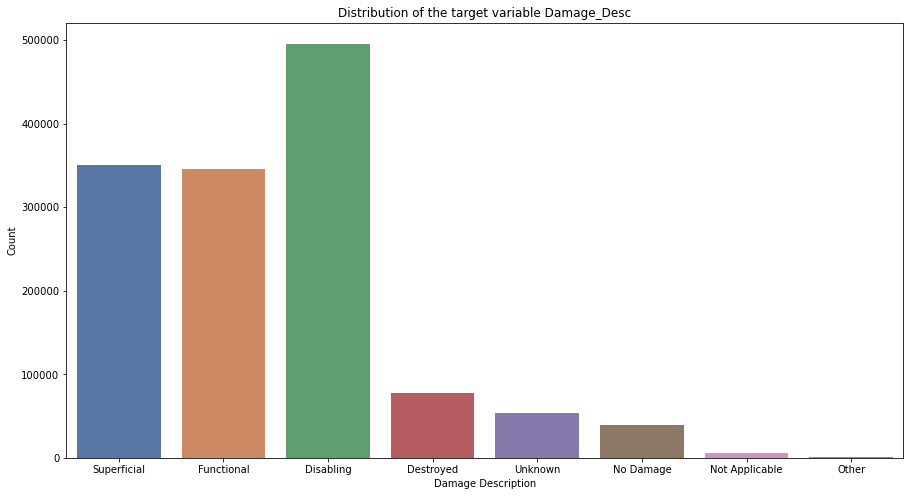

In [32]:
sns.countplot(x='DAMAGE_DESC',palette = 'deep', data=df_new)
plt.gcf().set_size_inches(15,8)
plt.title('Distribution of the target variable Damage_Desc')
plt.xlabel('Damage Description')
plt.ylabel('Count')
plt.show()

##### Observations

Many of the Vehicles were left in a Disabling condition followed by Superficial and Functional.

##### Distribution of Vehicle that caused the Damage

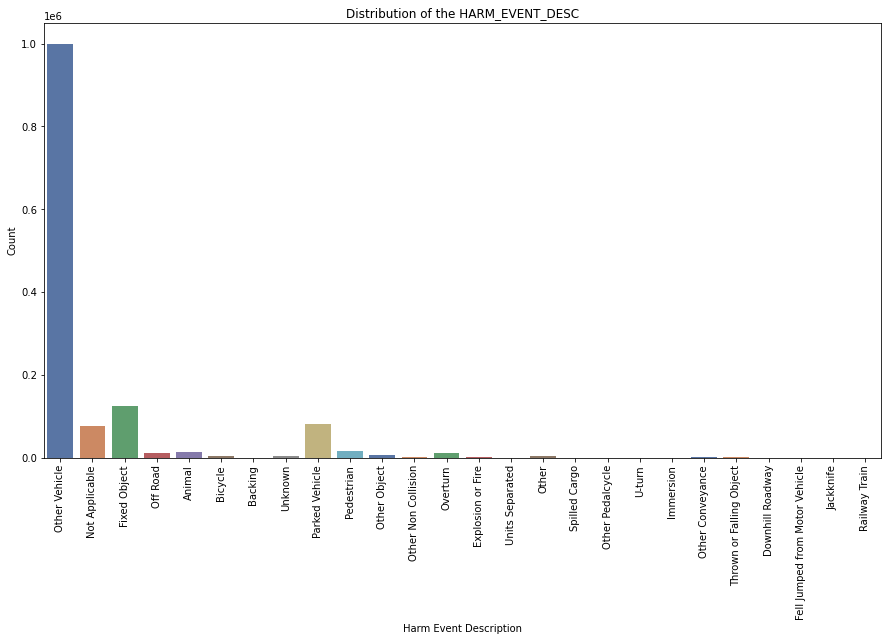

In [33]:
sns.countplot(x='HARM_EVENT_DESC',palette = 'deep', data=df_new)
plt.gcf().set_size_inches(15,8)
plt.xticks(rotation='vertical')
plt.title('Distribution of the HARM_EVENT_DESC')
plt.xlabel('Harm Event Description')
plt.ylabel('Count')
plt.show()

##### Observations

From the Distribution we can see that most of the crashes caused are by other vehicles 

##### Distribution of the Movement of the vehicle

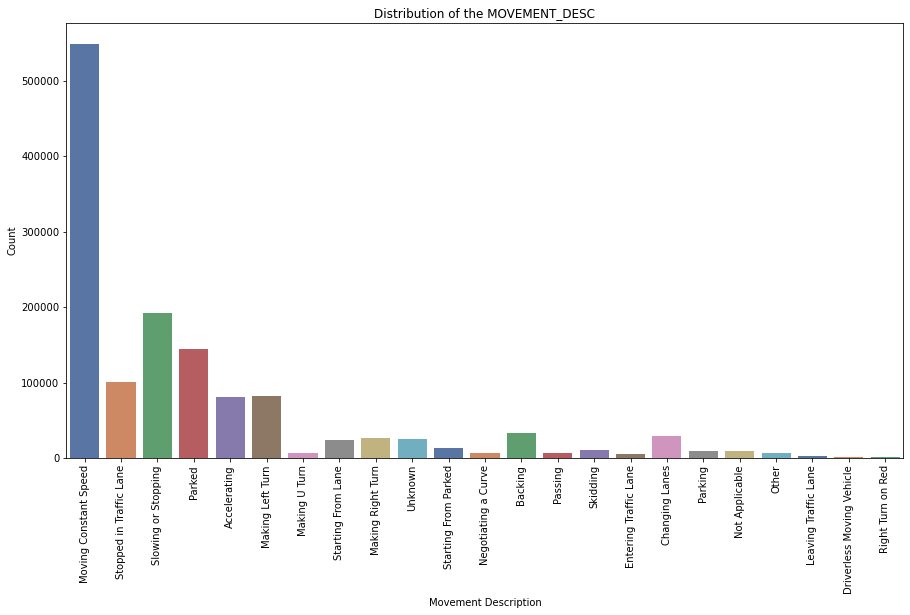

In [34]:
sns.countplot(x='MOVEMENT_DESC',palette = 'deep', data=df_new)
plt.gcf().set_size_inches(15,8)
plt.xticks(rotation='vertical')
plt.title('Distribution of the MOVEMENT_DESC')
plt.xlabel('Movement Description')
plt.ylabel('Count')
plt.show()

##### Observations

From the Distribution we can observe that many vehicles which are invloved in a crash are moving at a constant speed.

##### Distribution of the Body type of the vehicle

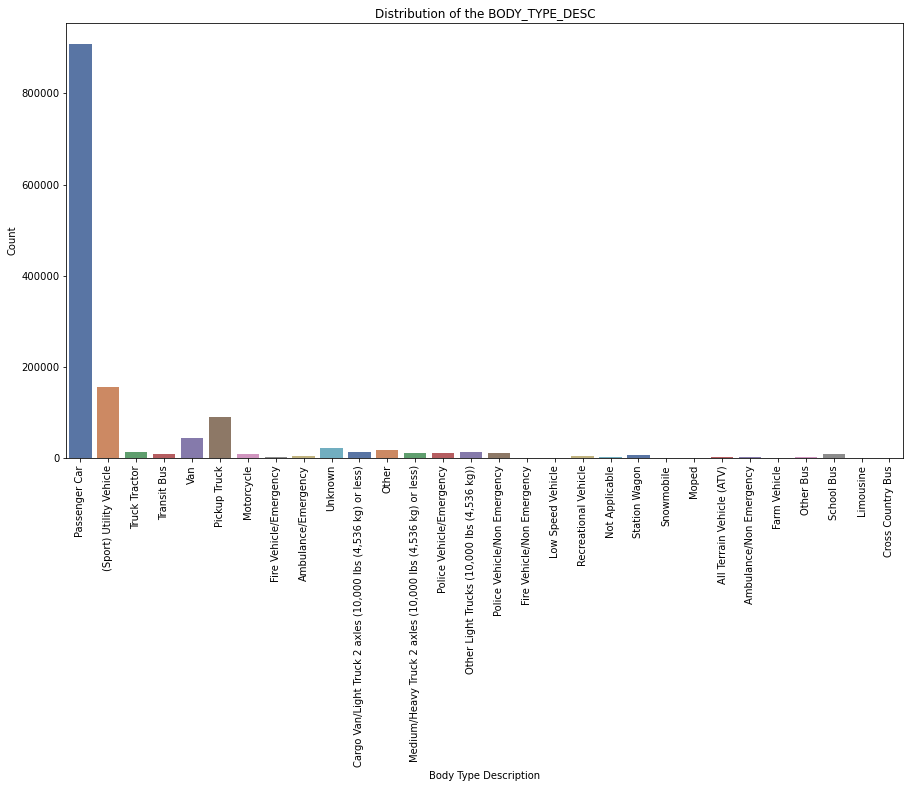

In [35]:
sns.countplot(x='BODY_TYPE_DESC',palette = 'deep', data=df_new)
plt.gcf().set_size_inches(15,8)
plt.xticks(rotation='vertical')
plt.title('Distribution of the BODY_TYPE_DESC')
plt.xlabel('Body Type Description')
plt.ylabel('Count')
plt.show()

##### Observations

Most of the cars involved in crashes are passenger cars.

##### Distribution of Speed Limit

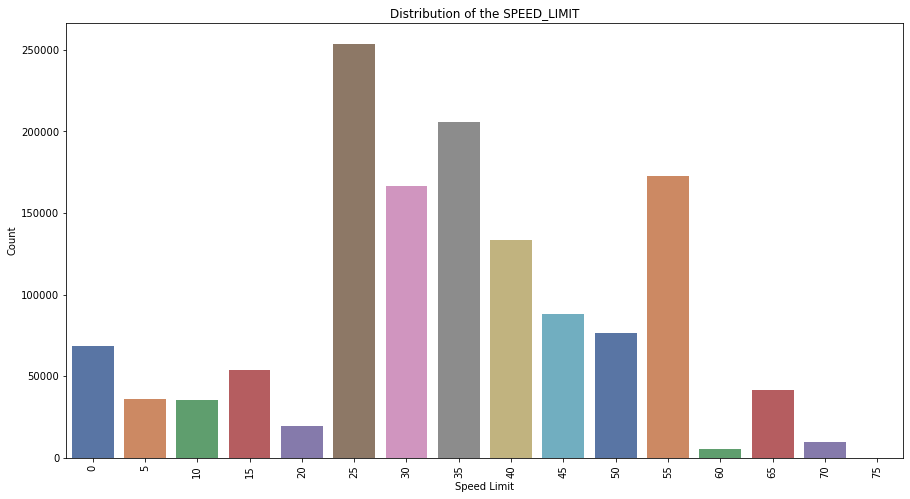

In [36]:
sns.countplot(x='SPEED_LIMIT',palette = 'deep', data=df_new)
plt.gcf().set_size_inches(15,8)
plt.xticks(rotation='vertical')
plt.title('Distribution of the SPEED_LIMIT')
plt.xlabel('Speed Limit')
plt.ylabel('Count')
plt.show()

##### Observations

Most of the places crashes occured were at places with speed limit 25

##### Distribution of Hit and Run 

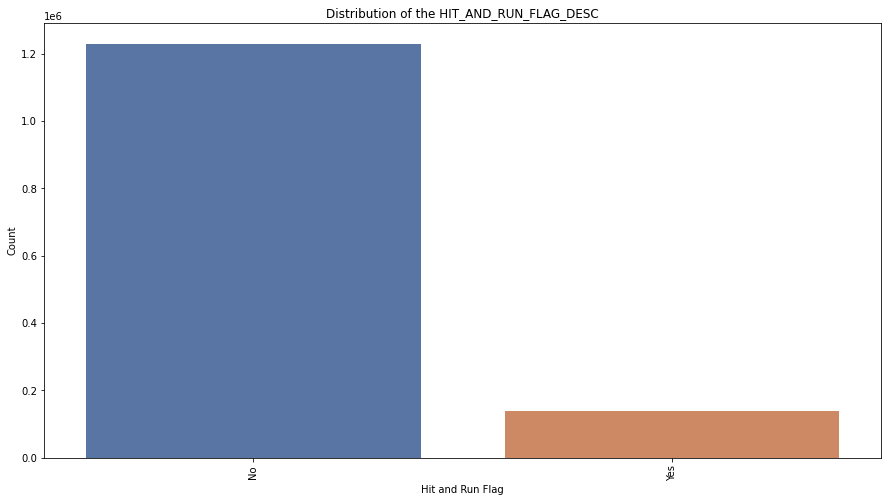

In [37]:
sns.countplot(x='HIT_AND_RUN_FLAG_DESC',palette = 'deep', data=df_new)
plt.gcf().set_size_inches(15,8)
plt.xticks(rotation='vertical')
plt.title('Distribution of the HIT_AND_RUN_FLAG_DESC')
plt.xlabel('Hit and Run Flag')
plt.ylabel('Count')
plt.show()

##### Observations

Many of them were not hit and run.

##### Distribution of Area where the damage occurred

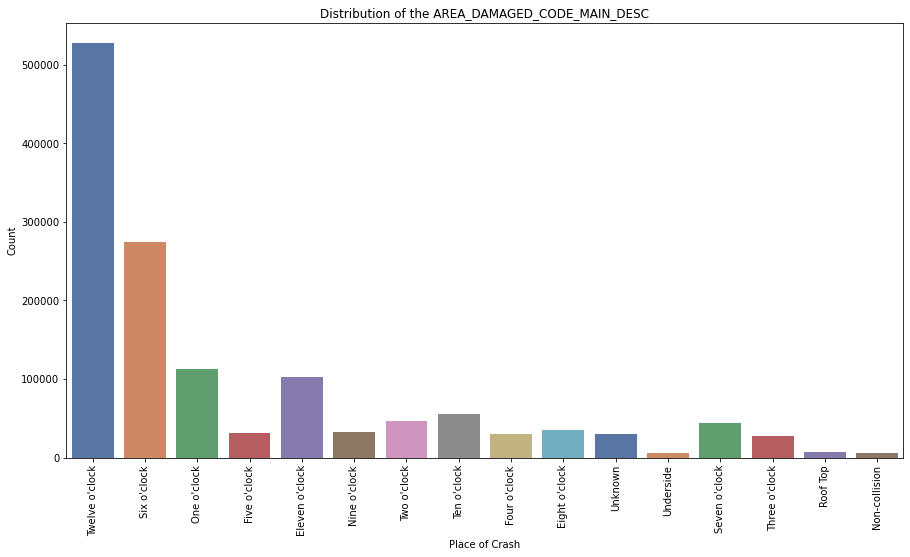

In [38]:
sns.countplot(x='AREA_DAMAGED_CODE_MAIN_DESC',palette = 'deep', data=df_new)
plt.gcf().set_size_inches(15,8)
plt.xticks(rotation='vertical')
plt.title('Distribution of the AREA_DAMAGED_CODE_MAIN_DESC')
plt.xlabel('Place of Crash')
plt.ylabel('Count')
plt.show()

##### Observations

From the Distribution we can say that most of the crashes were Rear-End or head-on.

##### Distribution of Parking

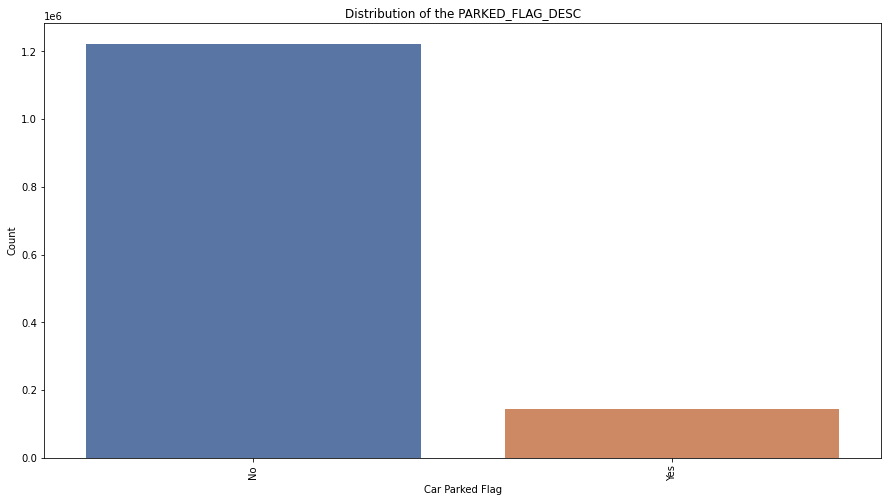

In [39]:
sns.countplot(x='PARKED_FLAG_DESC',palette = 'deep', data=df_new)
plt.gcf().set_size_inches(15,8)
plt.xticks(rotation='vertical')
plt.title('Distribution of the PARKED_FLAG_DESC')
plt.xlabel('Car Parked Flag')
plt.ylabel('Count')
plt.show()

##### Observations

Most of the cars involved in the crash were not Parked.

##### Distribution to see the type of damage caused at places with certain Speed Limit

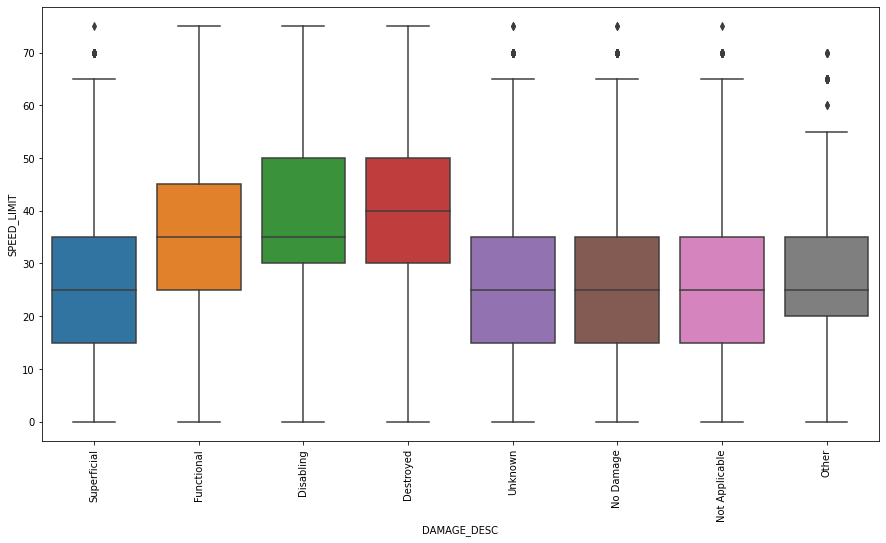

In [40]:
sns.boxplot(df_new.DAMAGE_DESC,df_new.SPEED_LIMIT)
plt.gcf().set_size_inches(15,8)
plt.xticks(rotation='vertical')
plt.show()

##### Observations

This shows how the impact of the vehicle was by the rise of speed limit. At a speed limit of more than 40 the impact level was "Destroyed" or " Disabling". And every other impacts are at a speed limit of below 50.